# logistic 回归

 logistic回归，是进行分类的模型

![jupyter](./class_eleven_1.png)

![jupyter](./class_eleven_2.png)

## sklearn

### 模型建立

LogisticRegression(tol=0.0001, fit_intercept=True, class_weight=None, max_iter=100)  
tol：用于指定模型收敛的阈值
fit_intercept：bool类型参数，是否拟合模型的截距项，默认为True  
class_weight：用于指定因变量类别的权重，如果为字典，则痛字典的形式{class_label:weight}传递每个类别的权重；如果为字符串'balanced'，则每个分类的权重与实际样本中的比例成反比，当各分类存在严重不平衡时，设置为'balance'会比较好；如果为None，则表示每个分类的权重相等  
max_iter：指定模型求解过程中的最大迭代次数，默认为100

In [2]:
#导入第三方模块
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import linear_model

In [3]:
#读取数据
sports = pd.read_csv(r'./data_class/Run or Walk.csv')
sports.head()

,date,time,username,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017/6/30,13:51:15:847724020,viktor,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017/6/30,13:51:16:246945023,viktor,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017/6/30,13:51:16:446233987,viktor,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017/6/30,13:51:16:646117985,viktor,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017/6/30,13:51:16:846738994,viktor,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [7]:
#提取所有自变量名称
predictors = sports.columns[4:]
#构建自变量矩阵
X = sports[predictors]
#提取Y变量值
y = sports.activity
#将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1234)

In [11]:
#利用训练集数据建模
sklearn_logistic = linear_model.LogisticRegression()
sklearn_logistic.fit(X_train, y_train)
#返回模型的各个参数
print(sklearn_logistic.intercept_, sklearn_logistic.coef_)

[4.36637441] [[ 0.48695898  6.87517973 -2.44872468 -0.01385936 -0.16085022  0.13389695]]


### 模型预测

In [13]:
#模型预测
sklearn_predict = sklearn_logistic.predict(X_test)
#预测结果统计
pd.Series(sklearn_predict).value_counts()

0    12119
1    10028
dtype: int64

### 模型评估

#### 混淆矩阵

![jupyter](./class_eleven_3.png)

In [14]:
#导入第三方模块
from sklearn import metrics
#混淆矩阵
cm = metrics.confusion_matrix(y_test, sklearn_predict, labels=[0, 1])
cm

array([[9969, 1122],
       [2150, 8906]])

In [30]:
#计算几个率
Accuracy = metrics.accuracy_score(y_test, sklearn_predict)
Sensitivity = metrics.recall_score(y_test, sklearn_predict)
Specificity = metrics.recall_score(y_test, sklearn_predict, pos_label=0)
print('模型准确率为%.2f%%:'%(Accuracy*100))
print('正例覆盖率为%.2f%%:'%(Sensitivity*100))
print('负例覆盖率为%.2f%%:'%(Specificity*100))

模型准确率为85.23%:
正例覆盖率为80.55%:
负例覆盖率为89.88%:


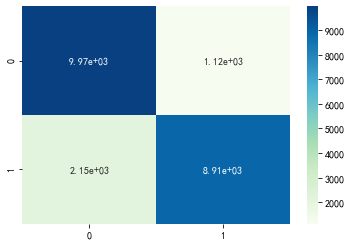

In [33]:
#混淆矩阵可视化
#导入第三方模块
import seaborn as sns
import matplotlib.pyplot as plt
#绘制热力图
sns.heatmap(cm, annot=True, fmt='.2e', cmap='GnBu')
#图形显示
plt.show()

#### AUC曲线

![jupyter](./class_eleven_4.png)

In [34]:
#y得分为模型预测正例的概率
y_score = sklearn_logistic.predict_proba(X_test)[:,1]
y_score

array([0.53999136, 0.05332726, 0.08395246, ..., 0.06702634, 0.19066771,
       0.94551656])

In [37]:
#计算不同阈值下，fpr和tpr的组合值，其中fpr表示1-Specity, tpr表示Sensitivity
fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)

#计算AUC的值
roc_auc = metrics.auc(fpr, tpr)

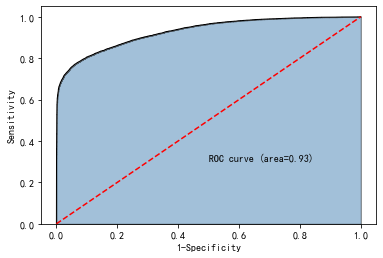

In [39]:
#绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black')
#添加边际线
plt.plot(fpr, tpr, color='black', lw=1)
#添加对角线
plt.plot([0,1], [0,1], color='red', linestyle='--')
#添加文本信息
plt.text(0.5, 0.3, 'ROC curve (area=%0.2f)'%roc_auc)
#添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
#显示图形
plt.show()

#### K-S曲线

![jupyter](./class_eleven_5.png)

In [40]:
#K-S曲线的绘制
#导入第三方包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [55]:
#自定义绘制K-S曲线的函数
def plot_ks(y_test, y_score, positive_flag):
    #对y_test重新设置索引
    y_test.index = np.arange(len(y_test))
    #构建目标数据集
    target_data = pd.DataFrame({'y_test':y_test, 'y_score':y_score})
    #按y_score降序排列
    target_data.sort_values(by='y_score', ascending=False, inplace=True)
    #自定义分位点
    cuts = np.arange(0.1, 1, 0.1)
    #计算各分位点对应的Score值
    index = len(target_data.y_score)*cuts
    scores = np.array(target_data.y_score)[index.astype('int')]
    #根据不同的Score值，计算Sensitivity和Specificity
    Sensitivity = []
    Specificity = []
    for score in scores:
        #正例覆盖样本数量和实际正例样本量
        positive_recall = target_data.loc[(target_data.y_test==positive_flag) & (target_data.y_score > score), :].shape[0]
        positive = sum(target_data.y_test == positive_flag)
        #负例覆盖样本量和实际负例样本量
        negative_recall = target_data.loc[(target_data.y_test != positive_flag) & (target_data.y_score <= score), :].shape[0]
        negative = sum(target_data.y_test != positive_flag)
        Sensitivity.append(positive_recall/positive)
        Specificity.append(negative_recall/negative)
    #构建绘图数据
    plot_data = pd.DataFrame({'cuts':cuts, 'y1':1-np.array(Specificity), 'y2':np.array(Sensitivity),
                             'ks':np.array(Sensitivity)-(1-np.array(Specificity))})
    #寻找Sensitivity和1-Specificity之差的最大索引
    max_ks_index = np.argmax(plot_data.ks)
    plt.plot([0]+cuts.tolist()+[1], [0]+plot_data.y1.tolist()+[1], label='1-Specificity')
    plt.plot([0]+cuts.tolist()+[1], [0]+plot_data.y2.tolist()+[1], label='Sensitivity')
    #添加参考线
    plt.vlines(plot_data.cuts[max_ks_index], ymin=plot_data.y1[max_ks_index],
              ymax=plot_data.y2[max_ks_index], linestyle='--')
    #添加文本信息
    plt.text(x=plot_data.cuts[max_ks_index]+0.01, y=plot_data.y1[max_ks_index]+plot_data.ks[max_ks_index]/2,
            s = 'KS=%.2f'%plot_data.ks[max_ks_index])
    #显示图例
    plt.legend()
    plt.show()
    

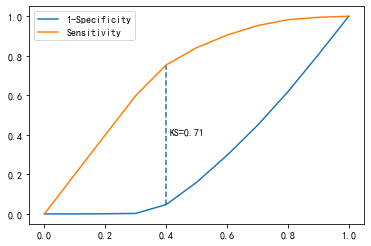

In [56]:
#调用自定义函数， 绘制K-S曲线
plot_ks(y_test=y_test, y_score=y_score, positive_flag=1)

## statsmodels

### 建模

In [58]:
#建模
#导入第三方模块
import statsmodels.api as sm
#拆分数据
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1234)
#为训练集和测试集数据的矩阵添加常数列1
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)
#拟合Logistic模型
sm_logistic = sm.Logit(y_train, X_train2).fit()
#返回模型参数
sm_logistic.params

Optimization terminated successfully.
         Current function value: 0.324875
         Iterations 8


const             4.388537
acceleration_x    0.489617
acceleration_y    6.906590
acceleration_z   -2.459638
gyro_x           -0.014715
gyro_y           -0.161164
gyro_z            0.134655
dtype: float64

### 模型预测

In [60]:
sm_y_probability = sm_logistic.predict(X_test2)
sm_y_probability

25365    0.540706
41930    0.052846
594      0.083316
69382    0.023588
87101    0.999483
           ...   
59284    0.999899
85830    0.997302
41669    0.066412
45092    0.189987
81236    0.946379
Length: 22147, dtype: float64

### 模型评估

#### 混淆矩阵

In [61]:
#根据概率值，将观测进行分类，以0.5作为阈值
sm_pred_y = np.where(sm_y_probability >= 0.5, 1, 0)
#混淆矩阵
cm = metrics.confusion_matrix(y_test, sm_pred_y, labels=[0, 1])
cm

array([[9967, 1124],
       [2149, 8907]])

#### 绘制ROC曲线

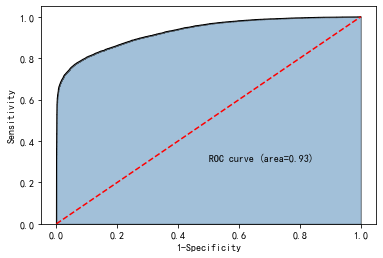

In [63]:
#计算真正率和假正率
fpr, tpr, threshold = metrics.roc_curve(y_test, sm_y_probability)

#计算AUC的值
roc_auc = metrics.auc(fpr, tpr)

#绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha=0.5, edgecolor='black')
#添加边际线
plt.plot(fpr, tpr, color='black', lw=1)
#添加对角线
plt.plot([0,1], [0,1], color='red', linestyle='--')
#添加文本信息
plt.text(0.5, 0.3, 'ROC curve (area=%0.2f)'%roc_auc)
#添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
#显示图形
plt.show()

#### K-S曲线

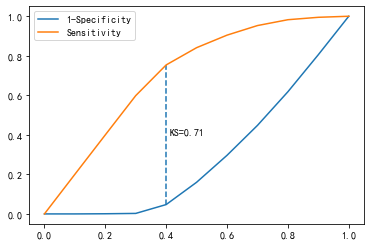

In [65]:
# 调用自定义函数，绘制K-S曲线
#sm_y_probability.index = np.arange(len(sm_y_probability))
plot_ks(y_test = y_test, y_score = sm_y_probability, positive_flag = 1)